Ejercicios de exploración

1. Modifica el conjunto de datos agregando más instancias con comentarios de películas y etiquetas de sentimientos.
2. Experimenta con diferentes técnicas de preprocesamiento de texto, como eliminación de stopwords o lematización, y observa cómo afecta la precisión del clasificador.
3. Prueba otros algoritmos de clasificación disponibles en NLTK, como clasificador de árboles de decisión o clasificador de máquinas de vectores de soporte (SVM), ycompara sus resultados con el clasificador Naive Bayes.
4. Crea una función para calcular métricas adicionales de evaluación del clasificador, como precisión, recall y F1-score, y aplícala al modelo entrenado.
5. Experimenta con la clasificación de nuevos textos ingresados manualmente y observa cómo el clasificador etiqueta diferentes comentarios de películas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import nltk
from nltk.corpus import stopwords # import the stopwords module
from nltk.tokenize import word_tokenize # import the word_tokenize function
import warnings
warnings.filterwarnings("ignore")
import os
import csv # Import the csv module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import random
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('punkt')
from sklearn.tree import DecisionTreeClassifier


# 1. Modifica el conjunto de datos agregando más instancias con comentarios de películas y etiquetas de sentimientos.  Find dataset of review of movies
# se trae el dataset de Sentiment Analysis consists of 50.000 comments. There are 25000 negative and 25000 positive comments. Comments are of different lengths and are given in sentences.
# origen https://www.kaggle.com/code/rafetcan/sentiment-analysis


# Use 'on_bad_lines' instead of 'error_bad_lines' to handle bad lines
#nuevos_datos = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip') # Skip bad lines
#nuevos_datos.head()
#nuevos_datos.columns
#print(nuevos_datos.sentiment.value_counts())
#print(nuevos_datos[:10])

data = []
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the caracters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how I enjoyed this flim", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The perfomances by the actors were lackluster", "negative"),
    ("I was on the edge of my seat the whole time", "positive"),
    ("Although the premise was intriguing, the plot was a little hard to follow", "negative"),
    ("The completely implausible twist at the end ruined it", "negative"),
    ("It’s the feel-good movie of the year", "positive"),
    ("I found it very touching", "positive"),
    ("To be honest, I liked the remake better than the original", "positive"),
    ("The movie was enjoyable", "positive"),
    ("This movie was intriguing", "positive"),
    ("The movie was boring", "negative"),
    ("This movie is powerful", "positive"),
    ("This movie is not good", "negative"),
    ("This movie is amazing", "positive"),
    ("This movie is awful", "negative"),
    ("This movie is terrific", "positive"),
    ("I don't undesrtand this movie", "negative"),
    ("This film is beautiful", "positive"),
    ("This movie haven't good", "negative"),
    ("This film is really basic", "negative"),
    ("This movie isn't real", "negative"),
    ("This movie is false", "negative")
    ]

# Concatenar los datos
#data_combinado = pd.concat([pd.DataFrame(data, columns=['review', 'sentiment']), nuevos_datos], ignore_index=True)
#data_combinado.head()
#print(data_combinado.sentiment.value_counts())
#print(data_combinado[:10])

#for _, row in nuevos_datos.iterrows():
#    data.append((row['review'], row['sentiment']))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


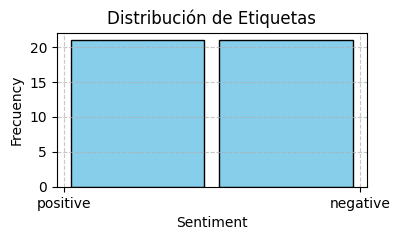

In [ ]:
# Revisar la distribución en un histograma
labels = [label for (review, label) in data]
plt.figure(figsize=(4, 2))
plt.hist(labels, color='skyblue', edgecolor='black', rwidth=0.9, bins=2)  # rwidth controla el ancho de las barras
plt.xlabel('Sentiment')
plt.ylabel('Frecuency')
plt.title('Distribución de Etiquetas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

[('this', 28), ('movie', 25), ('the', 25), ('i', 13), ('is', 12), ('was', 12), ('film', 6), ('of', 5), ('in', 4), ('my', 4), ('and', 4), ('to', 3), ('by', 3), ('amazing', 2), ('time', 2), ('on', 2), ('enjoyed', 2), ('plot', 2), ('found', 2), ('be', 2)]


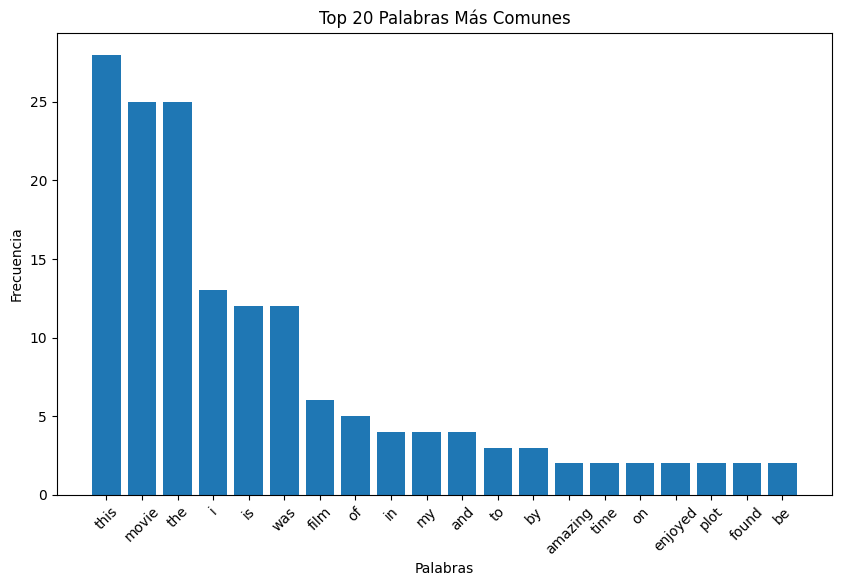

In [ ]:
# Histograma de palabras
from collections import Counter

# Extraer todas las palabras
all_words = []
for text, _ in data:
    all_words.extend(text.lower().split())

# Contar frecuencia de palabras
word_counts = Counter(all_words)

# Obtener las 20 palabras más comunes
top_20_words = word_counts.most_common(20)
print(top_20_words)
# Crear un gráfico de barras
words, counts = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras Más Comunes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Crear una función para lematizar
lemmatizer = WordNetLemmatizer()

def lemmatizar_texto(texto):
    palabras = word_tokenize(texto)
    palabras_lematizadas = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    return ' '.join(palabras_lematizadas)

In [ ]:
# Aplicar la función de lematización a cada comentario
data_lematizada = []
for comentario, etiqueta in data:
    comentario_lematizado = lemmatizar_texto(comentario)
    data_lematizada.append((comentario_lematizado, etiqueta))

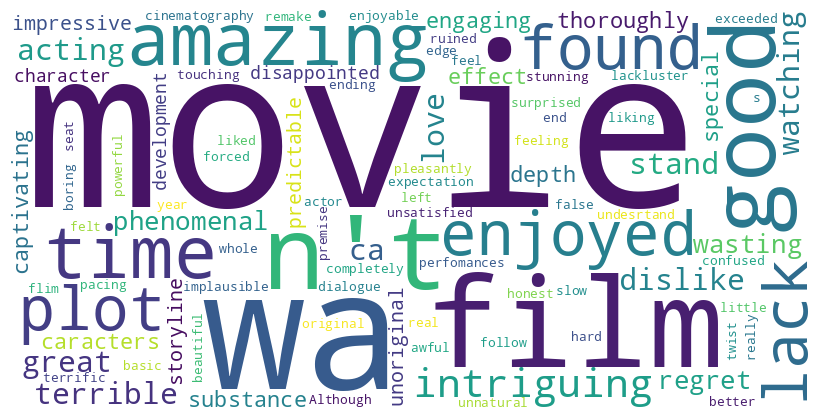

In [ ]:
# Une todos los textos lematizados
texto_lematizado = " ".join([texto for texto, _ in data_lematizada])

# Define stopwords
stopwords = set(STOPWORDS)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(texto_lematizado)

# Muestra la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Aplicamos el procesamiento a los datos
featuresets = [({"text": lemmatizar_texto(text)}, label) for (text, label) in data]
print(featuresets)

[({'text': 'I love this movie'}, 'positive'), ({'text': 'This movie is terrible'}, 'negative'), ({'text': 'This movie is great'}, 'positive'), ({'text': 'I dislike this movie'}, 'negative'), ({'text': 'This film is amazing'}, 'positive'), ({'text': "I ca n't stand watching this movie"}, 'negative'), ({'text': 'The acting in this movie is phenomenal'}, 'positive'), ({'text': 'I regret wasting my time on this film'}, 'negative'), ({'text': 'I thoroughly enjoyed this movie'}, 'positive'), ({'text': 'This movie lack depth and substance'}, 'negative'), ({'text': 'The plot of this movie wa captivating'}, 'positive'), ({'text': 'I found the caracters in this film to be very engaging'}, 'positive'), ({'text': 'The special effect in this movie were impressive'}, 'positive'), ({'text': 'The storyline wa predictable and unoriginal'}, 'negative'), ({'text': 'I wa disappointed by the lack of character development'}, 'negative'), ({'text': 'The cinematography in this film wa stunning'}, 'positive'),

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_set, test_set = featuresets[:16], featuresets[16:]
print(train_set)
print(test_set)

[({'text': 'I love this movie'}, 'positive'), ({'text': 'This movie is terrible'}, 'negative'), ({'text': 'This movie is great'}, 'positive'), ({'text': 'I dislike this movie'}, 'negative'), ({'text': 'This film is amazing'}, 'positive'), ({'text': "I ca n't stand watching this movie"}, 'negative'), ({'text': 'The acting in this movie is phenomenal'}, 'positive'), ({'text': 'I regret wasting my time on this film'}, 'negative'), ({'text': 'I thoroughly enjoyed this movie'}, 'positive'), ({'text': 'This movie lack depth and substance'}, 'negative'), ({'text': 'The plot of this movie wa captivating'}, 'positive'), ({'text': 'I found the caracters in this film to be very engaging'}, 'positive'), ({'text': 'The special effect in this movie were impressive'}, 'positive'), ({'text': 'The storyline wa predictable and unoriginal'}, 'negative'), ({'text': 'I wa disappointed by the lack of character development'}, 'negative'), ({'text': 'The cinematography in this film wa stunning'}, 'positive')]

In [ ]:
# Entrenamos el clasificador
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)


Accuracy: 0.46153846153846156


In [ ]:
# Clasificamos un nuevo texto
new_text = "This movie is terrible"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "This movie is great"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "I dislike this movie"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "This film is amazing"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

Prediction: negative
Prediction: positive
Prediction: negative
Prediction: positive


In [ ]:
 # Calcular métricas de evaluación precision, recall, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import nltk # Import nltk for stopwords
from nltk.corpus import stopwords # Import stopwords

def calcular_metricas(y_true, y_pred):
    # Calcular métricas de evaluación
    precision = precision_score(y_true, y_pred, pos_label='positive')
    recall = recall_score(y_true, y_pred, pos_label='positive')
    f1 = f1_score(y_true, y_pred, pos_label='positive')

    return {'precision': precision, 'recall': recall, 'f1_score': f1}

def remove_stopwords(text): # Define the remove_stopwords function
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# data es una lista de tuplas (texto, etiqueta) y classifier es el clasificador entrenado
y_true = [etiqueta for _, etiqueta in data]
y_pred = [classifier.classify({'text': remove_stopwords(texto)}) for texto, _ in data]

metricas = calcular_metricas(y_true, y_pred)
print(metricas)

{'precision': 0.5, 'recall': 1.0, 'f1_score': 0.6666666666666666}


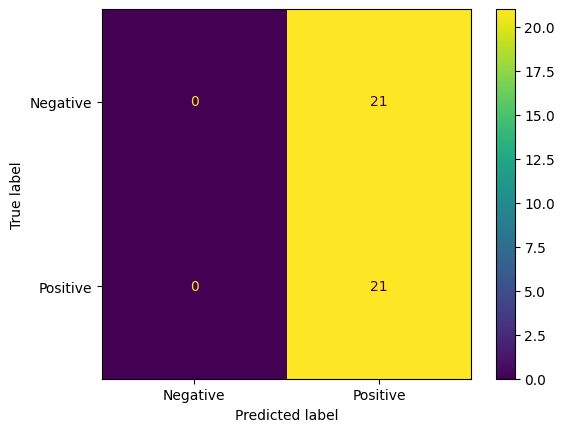

In [ ]:
# Matriz de Confusión
# Matriz de confusión y_true y y_pred son las etiquetas verdaderas y predichas, respectivamente
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

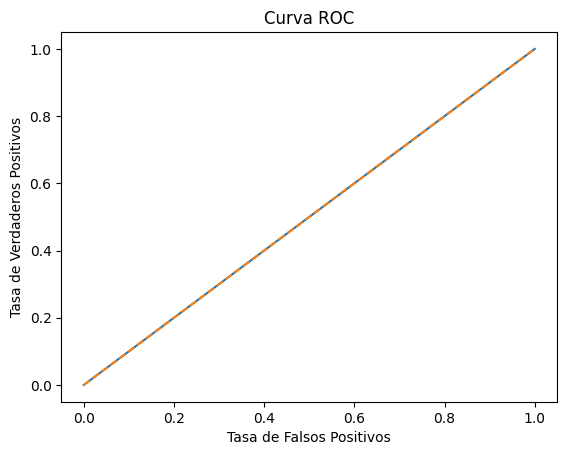

In [ ]:
# Calcula las probabilidades usando prob_classify de NLTK
y_probs = [classifier.prob_classify({'text': remove_stopwords(texto)}).prob('positive') for texto, _ in data]

# Extrae las etiquetas verdaderas de la variable 'data'
y_true = [label for _, label in data]  # Asumiendo que 'positive' es una de las etiquetas

# Calcula FPR, TPR, y thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs, pos_label='positive')

# Crea el gráfico de la curva ROC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

[({'text': 'love movie'}, 'positive'), ({'text': 'movie terrible'}, 'negative'), ({'text': 'movie great'}, 'positive'), ({'text': 'dislike movie'}, 'negative'), ({'text': 'film amazing'}, 'positive'), ({'text': "ca n't stand watching movie"}, 'negative'), ({'text': 'acting movie phenomenal'}, 'positive'), ({'text': 'regret wasting time film'}, 'negative'), ({'text': 'thoroughly enjoyed movie'}, 'positive'), ({'text': 'movie lacks depth substance'}, 'negative'), ({'text': 'plot movie captivating'}, 'positive'), ({'text': 'found caracters film engaging'}, 'positive'), ({'text': 'special effects movie impressive'}, 'positive'), ({'text': 'storyline predictable unoriginal'}, 'negative'), ({'text': 'disappointed lack character development'}, 'negative'), ({'text': 'cinematography film stunning'}, 'positive'), ({'text': 'dialogue felt forced unnatural'}, 'negative'), ({'text': 'pacing movie slow liking'}, 'negative'), ({'text': 'pleasantly surprised enjoyed flim'}, 'positive'), ({'text': 'en

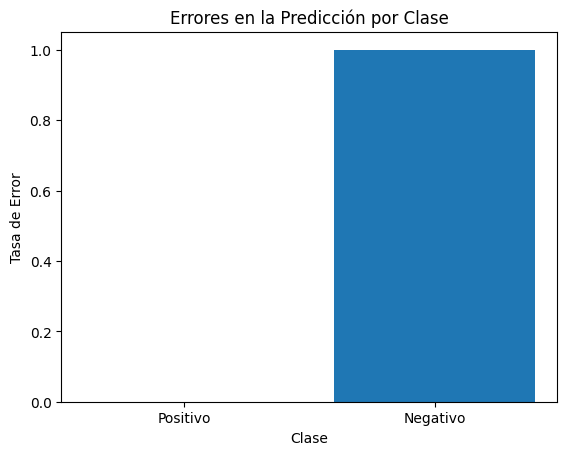

In [ ]:
#Gráfica de barras de errores
# Aplicamos el procesamiento a los datos
featuresets = [({"text": remove_stopwords(text)}, label) for (text, label) in data]
print(featuresets)
errores_positivos = []
errores_negativos = []

for i in range(len(y_true)):
  if y_true[i] == 'positive' and y_pred[i] == 'negative':
    errores_positivos.append(1)
  elif y_true[i] == 'negative' and y_pred[i] == 'positive':
    errores_negativos.append(1)

total_positivos = y_true.count('positive')
total_negativos = y_true.count('negative')

tasa_error_positivos = np.sum(errores_positivos) / total_positivos
tasa_error_negativos = np.sum(errores_negativos) / total_negativos

import matplotlib.pyplot as plt

plt.bar(['Positivo', 'Negativo'], [tasa_error_positivos, tasa_error_negativos])
plt.xlabel('Clase')
plt.ylabel('Tasa de Error')
plt.title('Errores en la Predicción por Clase')
plt.show()